# 교통사고유형별 발생현황 분석

데이터 준비<br/>
<a href="https://www.data.go.kr/data/15029185/standard.do">공공데이터 교통사고유형</a>


In [1]:
# !pip install folium

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
import squarify

In [3]:
# 차트 스타일 설정
plt.style.use('fivethirtyeight')

# D2Coding 폰트 설정
d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf'  # D2Coding 폰트 경로 설정
fm.fontManager.addfont(d2coding_path)
plt.rcParams["font.family"] = 'D2Coding'

# 마이너스 부호가 깨지지 않도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
file_path = "./data_set/전국교통사고다발지역표준데이터.csv"
data_ori = pd.read_csv(file_path,encoding='EUC-KR')
# data_ori.head()
data_pick = data_ori[['사고연도','사고유형구분','사고다발지역시도시군구','사고지역위치명','사고건수','위도','경도','사고다발지역폴리곤정보']]
data_pick.tail()

,사고연도,사고유형구분,사고다발지역시도시군구,사고지역위치명,사고건수,위도,경도,사고다발지역폴리곤정보
14473,2014,자전거,서울특별시 송파구10,서울특별시 송파구 거여동(마천사거리 부근),8,37.497152,127.146265,"{type:Polygon,coordinates:[[[127.1478646,37.49..."
14474,2014,자전거,서울특별시 송파구11,서울특별시 송파구 신천동(잠실역_일반국도3호선_진입_1 부근),7,37.514094,127.099354,"{type:Polygon,coordinates:[[[127.1009533,37.51..."
14475,2014,자전거,서울특별시 송파구12,서울특별시 송파구 삼전동(신양빌라 부근),7,37.501233,127.085015,"{type:Polygon,coordinates:[[[127.0866148,37.50..."
14476,2014,자전거,서울특별시 송파구13,서울특별시 송파구 가락동(문정시영아파트 부근),7,37.492374,127.136029,"{type:Polygon,coordinates:[[[127.1376285,37.49..."
14477,2014,자전거,서울특별시 송파구14,서울특별시 송파구 풍납동(천호사거리 부근),6,37.538616,127.123464,"{type:Polygon,coordinates:[[[127.1250644,37.53..."


In [6]:
data_pick.columns =['year','type','region1','region2','total','lat','lon','info']
data_pick = data_pick.copy()
data_pick['region1'] = data_pick['region1'].str.replace(r'\d+','',regex = True)
data_pick.sample(20)

,year,type,region1,region2,total,lat,lon,info
8167,2022,보행노인,서울특별시 양천구,서울특별시 양천구 신월동(임마누엘 선교비전센터 부근),5,37.516015,126.836134,"{type:Polygon,coordinates:[[[126.83793033,37.5..."
6073,2019,무단횡단,강원 강릉,강원도 강릉시 교동(하니엘커피 부근),5,37.764580,128.878171,"{type:Polygon,coordinates:[[[128.88086541,37.7..."
3403,2019,스쿨존어린이,경기도 수원시 장안구,경기도 수원시 장안구 영화동(화홍초교 부근),2,37.287117,127.003136,"{type:Polygon,coordinates:[[[127.00583114,37.2..."
1562,2015,자전거,경상남도 양산시,경상남도 양산시 북부동(경남은행앞 사거리 부근),4,35.343909,129.036459,"{type:Polygon,coordinates:[[[129.03825523,35.3..."
6536,2016,자전거,서울특별시 동작구,서울특별시 동작구 본동(한강대교남단사거리 부근),6,37.513572,126.955955,"{type:Polygon,coordinates:[[[126.95775169,37.5..."
67,2018,보행어린이,경기도 의정부시,경기도 의정부시 금오동(금신교차로 부근),3,37.748301,127.057918,"{type:Polygon,coordinates:[[[127.05971463,37.7..."
5535,2013,보행노인,서울특별시 마포구,서울특별시 마포구 노고산동(신촌로터리_신촌로_진입 부근),3,37.554897,126.936157,"{type:Polygon,coordinates:[[[126.9377578,37.55..."
6608,2014,자전거,부산광역시 수영구,부산광역시 수영구 광안동(효성 부근),8,35.164838,129.114528,"{type:Polygon,coordinates:[[[129.1160802,35.16..."
8807,2021,스쿨존어린이,경상북도 영천시,경상북도 영천시 망정동(포은초교 부근),2,35.980469,128.951457,"{type:Polygon,coordinates:[[[128.95415204,35.9..."
490,2019,보행노인,경기도 성남시 중원구,경기도 성남시 중원구 성남동(모란삼거리 부근),9,37.431623,127.129354,"{type:Polygon,coordinates:[[[127.13115045,37.4..."


In [7]:
data_type = data_pick.groupby('type')['total'].sum().reset_index(name='count')
data_type = data_type.sort_values('count',ascending=False)
data_type

,type,count
4,자전거,24939
1,보행노인,23165
0,무단횡단,14805
2,보행어린이,3802
3,스쿨존어린이,989


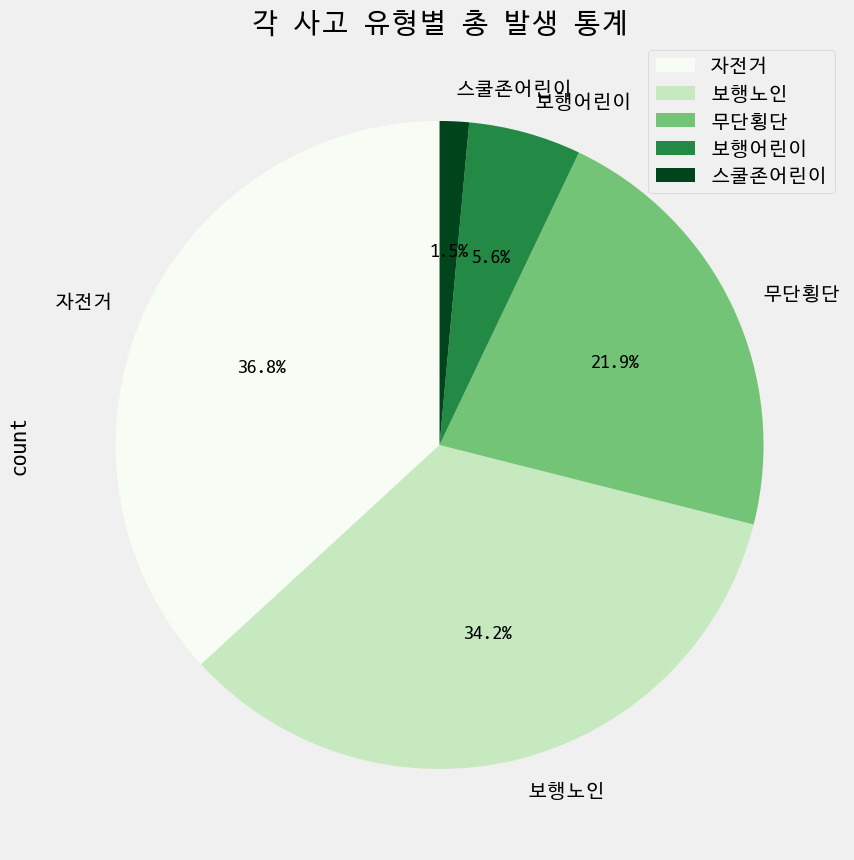

In [7]:
data_type.plot(
    kind='pie',  # 파이 차트를 생성합니다.
    y='count',  # 'count' 열의 값을 사용하여 파이 차트를 그립니다.
    labels=data_type['type'],  # 파이 차트의 각 조각에 'type' 열의 값을 레이블로 사용합니다.
    figsize=(10,10),  # 차트의 크기를 10x10 인치로 설정합니다.
    startangle=90,  # 파이 차트의 시작 각도를 90도로 설정하여 차트를 회전시킵니다.
    autopct='%2.1f%%',  # 각 조각의 비율을 소수점 첫째 자리까지 표시합니다.
    title="각 사고 유형별 총 발생 통계",  # 차트의 제목을 설정합니다.
    cmap=matplotlib.cm.Greens  # 차트의 색상 맵을 'Greens'로 설정합니다.
)
plt.savefig('./plot.png') #이미지로 차트를 저장

In [8]:
from IPython.display import display, HTML
# HTML 생성
html = f"""
<div style="display: flex;">
    <div style="flex: 1; padding: 10px;">
        <h3>Data Table</h3>
        {data_type.to_html(index=False)}
    </div>
    <div style="flex: 3; padding: 10px;">
        <h3>Pie Chart</h3>
        <img src="plot.png" alt="Pie Chart">
    </div>
</div> """
# HTML 표시
display(HTML(html))

type,count
자전거,24939
보행노인,23165
무단횡단,14805
보행어린이,3802
스쿨존어린이,989


In [9]:
data_pick2 = data_pick.copy()
title_array = data_type['type'] 
data_list = [] # 사고유형에 대한 데이터프레임을 배열로 담기
for t in title_array:
    data_list.append(data_pick2[data_pick2['type']==f'{t}']) # 각 사고유형 다 담기

In [10]:
data_list2=[] # 유형별 토탈 값을 담기
for d in data_list:
    data_list2.append(d.groupby('year')["total"].sum().reset_index(name='count'))    

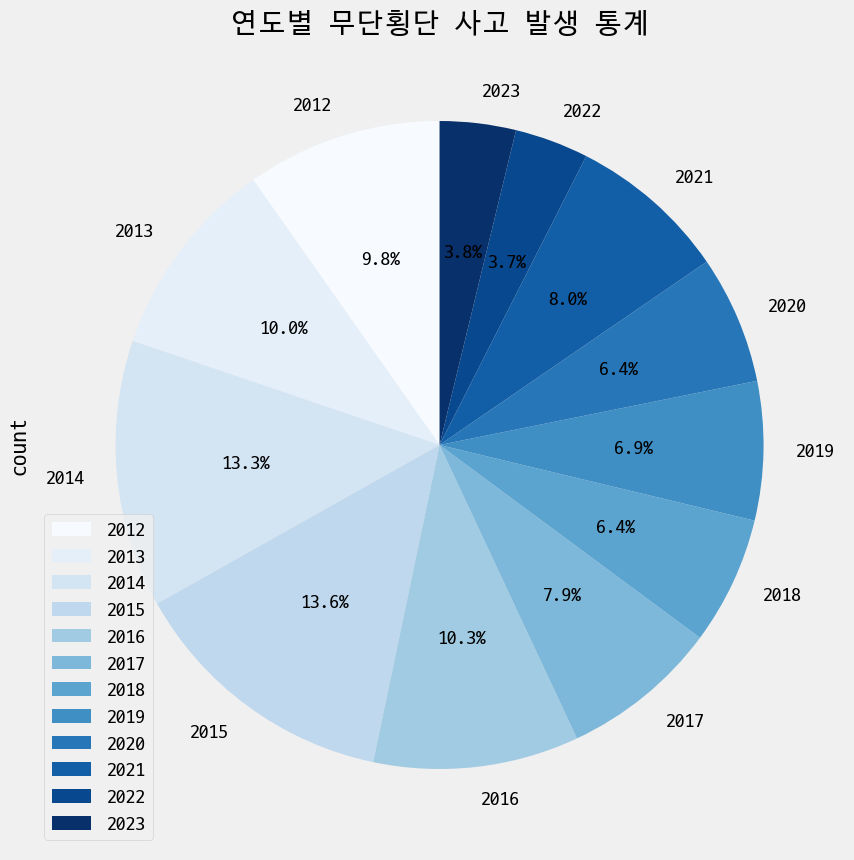

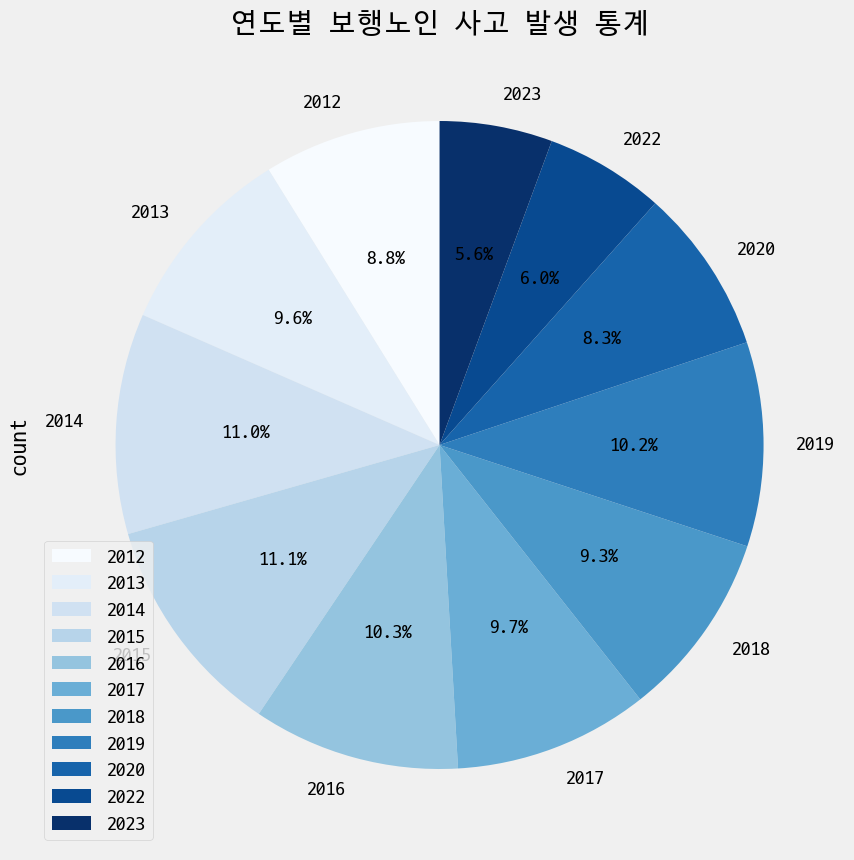

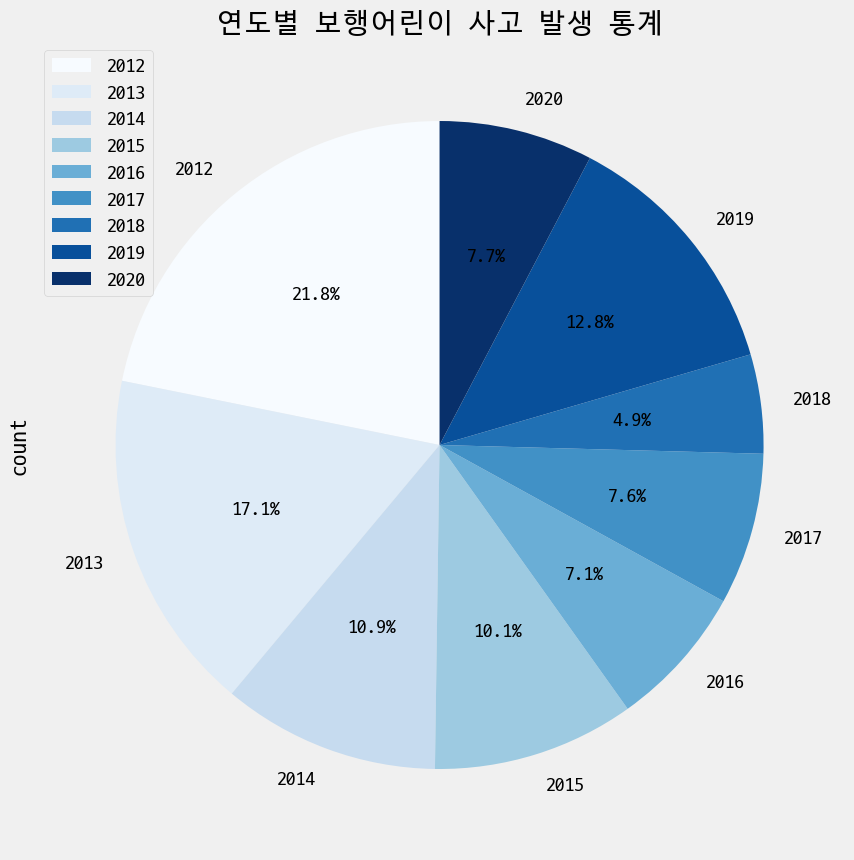

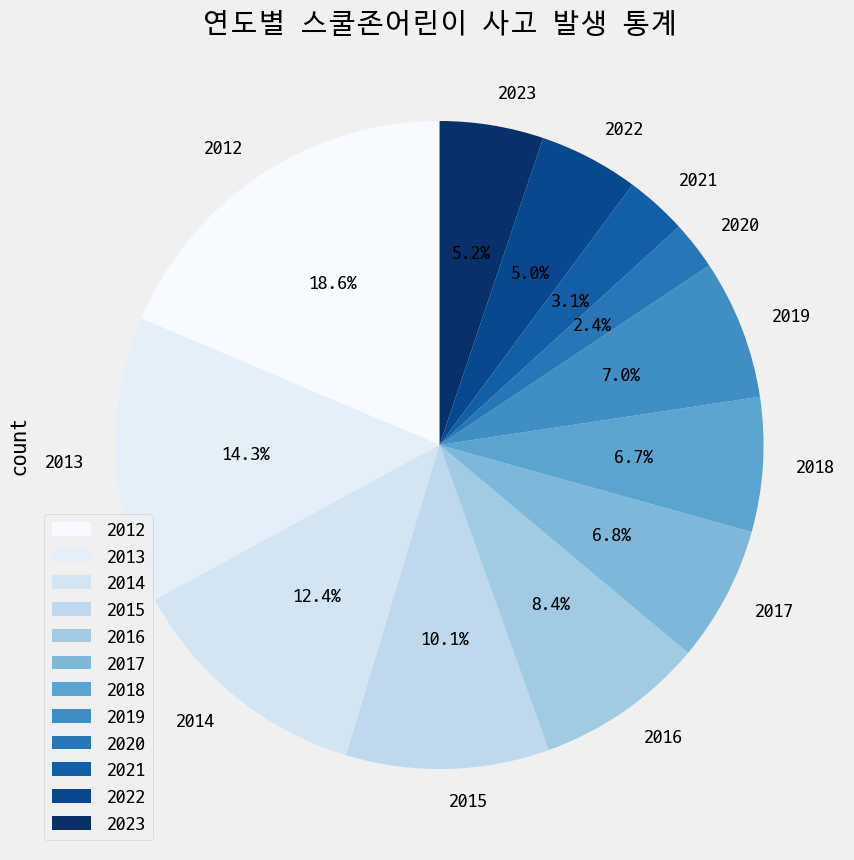

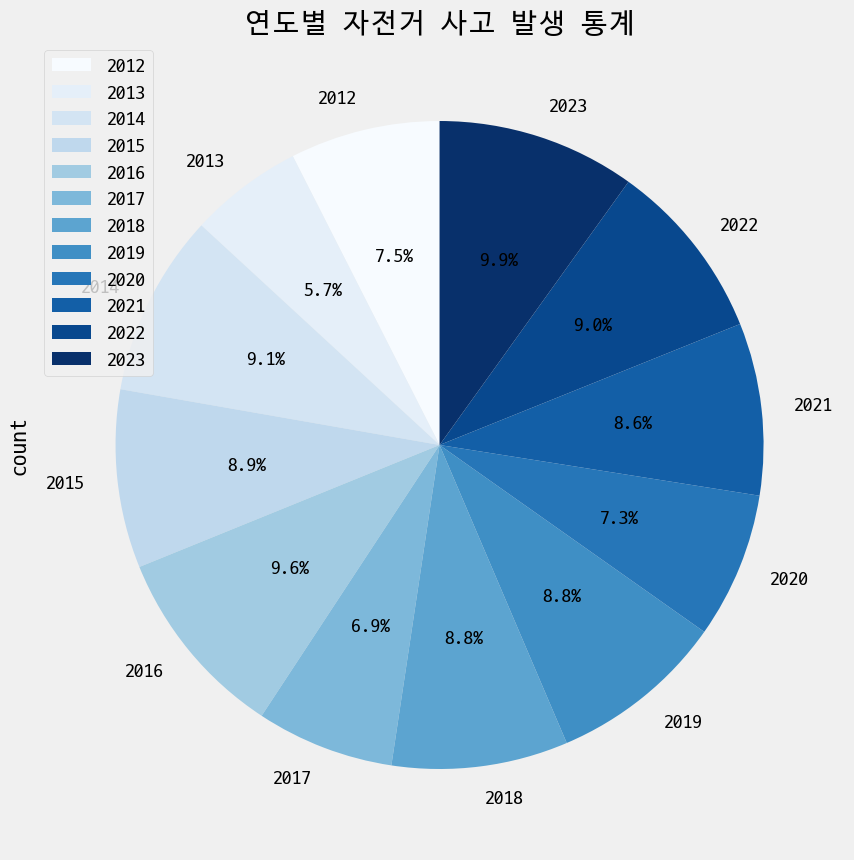

In [11]:
for i,f in enumerate(data_list2):
    f.plot(
        kind='pie',
        y= 'count',
        labels = f['year'],
        figsize=(10,10),
        startangle=90,
        autopct= '%.1f%%',
        title = f"연도별 {title_array[i]} 사고 발생 통계",
        cmap = matplotlib.cm.Blues
    )
    plt.savefig(f'./chart{i}.png')

In [12]:
from IPython.display import display, HTML
# HTML 생성
html = f"""
<div style="display: flex ;flex-wrap:wrap;width:1000px;">
    <div style="flex: 1; min-width:300px";>
        <div style="padding: 10px 0 10px 80px;">
        <h3>Data Table</h3>
        {data_type.to_html(index=False)}
        </div>
    </div>"""
for v in range(len(title_array)):
    html += f"""<div style="flex: 1; padding: 10px; min-width:300px">
            <h3>Pie Chart{v+1}</h3>
            <img src="chart{v}.png" alt="Pie Chart">
        </div>"""
html+=f"""</div> """
    # HTML 표시
# print(html)
display(HTML(html))

type,count
자전거,24939
보행노인,23165
무단횡단,14805
보행어린이,3802
스쿨존어린이,989


In [13]:
data_map = data_pick.copy() # 원본에서 복사해서 새로운 데이터처리 준비
title_array = data_type['type'] # 각 사고유형 타이틀
map_list = [] # 사고유형에 대한 데이터프레임을 배열로 담기

for t in title_array:
    map_list.append(data_pick2[data_pick2['type']==f'{t}']) # 각 사고유형  다 담기
map_list

[       year type    region1                             region2  total  \
 16     2015  자전거  서울특별시 노원구             서울특별시 노원구 중계동(고운유치원 부근)      4   
 17     2015  자전거  서울특별시 은평구           서울특별시 은평구 대조동(갈현동먹자골목 부근)      9   
 18     2015  자전거  서울특별시 은평구               서울특별시 은평구 역촌동(역촌역 부근)      9   
 19     2015  자전거  서울특별시 은평구              서울특별시 은평구 증산동(밀양빌딩 부근)      6   
 20     2015  자전거  서울특별시 은평구              서울특별시 은평구 신사동(송지빌딩 부근)      6   
 ...     ...  ...        ...                                 ...    ...   
 14473  2014  자전거  서울특별시 송파구             서울특별시 송파구 거여동(마천사거리 부근)      8   
 14474  2014  자전거  서울특별시 송파구  서울특별시 송파구 신천동(잠실역_일반국도3호선_진입_1 부근)      7   
 14475  2014  자전거  서울특별시 송파구              서울특별시 송파구 삼전동(신양빌라 부근)      7   
 14476  2014  자전거  서울특별시 송파구           서울특별시 송파구 가락동(문정시영아파트 부근)      7   
 14477  2014  자전거  서울특별시 송파구             서울특별시 송파구 풍납동(천호사거리 부근)      6   
 
              lat         lon  \
 16     37.643909  127.066198   
 17     37.618275  126.920932   

In [15]:
map_list2=[] # 유형별 토탈 값을 배열로 담기
for r in map_list:
    map_list2.append(r.groupby('region1')["total"].sum().reset_index(name='count').sort_values(['count'],ascending=False)[:20])
print(title_array,map_list2)

4       자전거
1      보행노인
0      무단횡단
2     보행어린이
3    스쿨존어린이
Name: type, dtype: object [         region1  count
129    서울특별시 송파구   1658
131   서울특별시 영등포구   1075
90      대구광역시 북구    973
87     대구광역시 달서구    952
122   서울특별시 동대문구    948
136    서울특별시 중랑구    735
91      대구광역시 서구    598
19       경기도 부천시    572
113    서울특별시 강동구    557
92     대구광역시 수성구    537
31   경기도 안산시 단원구    514
120    서울특별시 노원구    510
22   경기도 부천시 원미구    483
117    서울특별시 광진구    454
118    서울특별시 구로구    444
130    서울특별시 양천구    439
89      대구광역시 동구    400
127    서울특별시 성동구    376
133    서울특별시 은평구    348
114    서울특별시 강북구    348,              region1  count
150       서울특별시 동대문구    651
130       부산광역시 부산진구    473
156        서울특별시 성북구    397
142        서울특별시 강북구    368
161        서울특별시 은평구    354
164        서울특별시 중랑구    349
144        서울특별시 관악구    348
191         전라남도 여수시    340
159       서울특별시 영등포구    287
151        서울특별시 동작구    275
112        대구광역시 달서구    268
127         부산광역시 남구    264
115         대구광역시 북구    263
153       서울특별시 

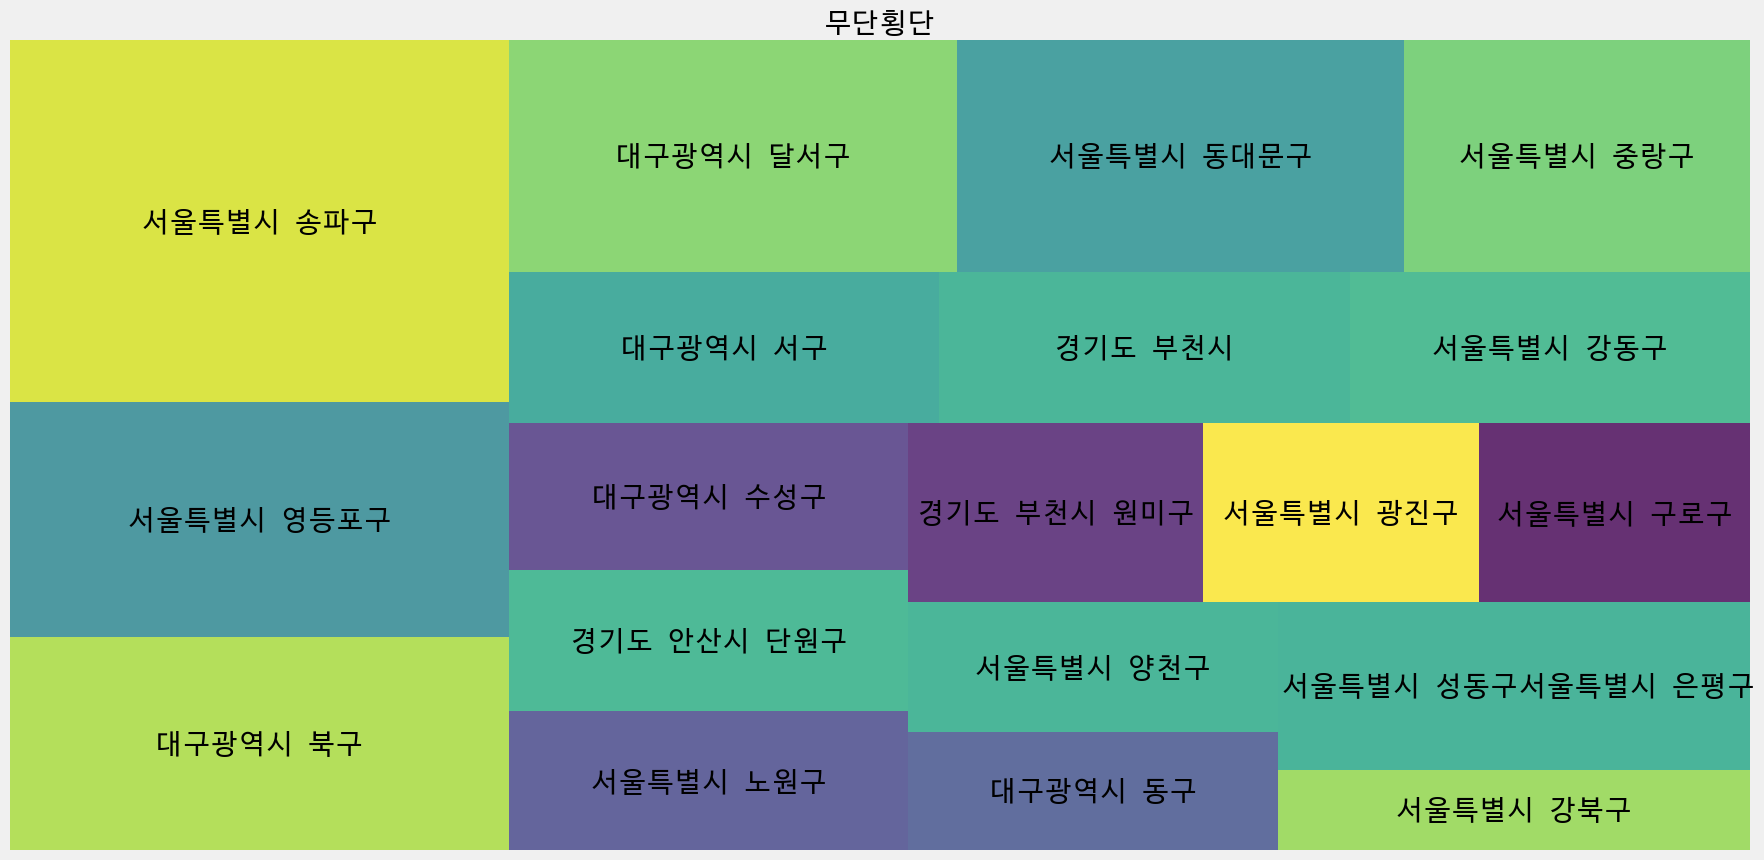

In [16]:
plt.figure(figsize=(20,10))
squarify.plot(    
    sizes = map_list2[0]['count'],
    label = map_list2[0]['region1'],
    alpha=0.8,
    # color= 'blue',
    text_kwargs={'fontsize':20}
)
plt.title(title_array[0])
plt.gca().invert_yaxis() # 기준 거꾸로
plt.axis('off')
plt.show()

In [17]:
pick = map_list[2]
pick = pick.sort_values(['total'], ascending=False).head(10)
pick

,year,type,region1,region2,total,lat,lon,info
13897,2013,무단횡단,서울 서울관악,서울특별시 관악구 신림동(신림역 부근),27,37.484117,126.929482,"{type:Polygon,coordinates:[[[126.9318806,37.48..."
5504,2012,무단횡단,경기 수원서부,경기도 수원시 팔달구 매산로1가(수원역남단교차로 부근),26,37.265498,127.001433,"{type:Polygon,coordinates:[[[127.0038242,37.26..."
13884,2013,무단횡단,서울 서울영등포,서울특별시 영등포구 영등포동3가(선한치과 부근),24,37.519199,126.908637,"{type:Polygon,coordinates:[[[126.9110365,37.52..."
5222,2012,무단횡단,부산 부산연제,부산광역시 연제구 연산동(연산교차로 부근),23,35.185305,129.082146,"{type:Polygon,coordinates:[[[129.0844755,35.18..."
14131,2013,무단횡단,경기 수원서부,경기도 수원시 팔달구 교동(수원역남단교차로 부근),23,37.266356,127.001493,"{type:Polygon,coordinates:[[[127.0038845,37.26..."
13856,2013,무단횡단,서울 서울종로,서울특별시 종로구 낙원동(종로2가 부근),23,37.570243,126.987575,"{type:Polygon,coordinates:[[[126.9899759,37.57..."
1513,2015,무단횡단,서울특별시 구로구,서울특별시 구로구 가리봉동(만민중앙교회 부근),22,37.480615,126.891547,"{type:Polygon,coordinates:[[[126.89424171,37.4..."
10903,2015,무단횡단,경기도 수원시 팔달구,경기도 수원시 팔달구 매산로1가(수원역동측단일로 부근),20,37.266833,127.001830,"{type:Polygon,coordinates:[[[127.0045248,37.26..."
13963,2013,무단횡단,부산 부산연제,부산광역시 연제구 연산동(연산교차로 부근),19,35.186417,129.081709,"{type:Polygon,coordinates:[[[129.0840384,35.18..."
12730,2014,무단횡단,부산 부산연제,부산광역시 연제구 연산동(연산교차로 부근),19,35.186737,129.082351,"{type:Polygon,coordinates:[[[129.08468,35.1886..."


In [2]:
#!pip install folium
#!pip install ipython

You should consider upgrading via the '/Users/jin/.pyenv/versions/3.9.10/bin/python3.9 -m pip install --upgrade pip' command.


In [36]:
#지도에 폴리곤 표시 
import folium
import json
from IPython.display import display

arr = []
for i in range(10):
    geojson_data = pick[['region1', 'info']].values[i][1]
    #JSON 형식의 문자열로 변환
    geojson_data = geojson_data.replace("'", '"').replace("type", '"type"').replace("Polygon", '"Polygon"').replace("coordinates",'"coordinates"') 
    #print(geojson_data)
    json_data = json.loads(geojson_data)
    coordinates = json_data['coordinates']
    # print(coordinates)
    coordinates[0] = [[lat, lon] for lon, lat in coordinates[0]]
    # print(coordinates)
    arr.append(coordinates)
#print(arr)
m = folium.Map(location=arr[0][0][0], zoom_start=15)
for co in arr:
    folium.Polygon(
        locations= co,
        color = 'green',
        weight = 1,
        fill = True,
        fill_color = 'blue',
        fill_opactity=0.5
    ).add_to(m)
m.save('map.html')
display(m)
               